In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.callbacks import Callback
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255
                             #width_shift_range=0.1,
                             #height_shift_range=0.1, 
                             #rotation_range=360,
                             #horizontal_flip=True,
                             #vertical_flip=True
)

#train_datagen.augmentation_parameters = True

#images are rescaled
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the path to the dataset
train_path = './train'
validation_path = './validation'
test_path = './test'

# Prepare data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(512, 512),
    batch_size=26,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(512, 512),
    batch_size=26,
    class_mode='categorical')

test_generator = validation_datagen.flow_from_directory(
    test_path,
    target_size=(512,512),
    batch_size=26,
    class_mode='categorical')

Found 2636 images belonging to 4 classes.
Found 877 images belonging to 4 classes.
Found 883 images belonging to 4 classes.


In [3]:
'''
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(512, 512, 3)), #this layer has 32 filters with size of (3,3)
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2), #dropout rate of 0.2
    tf.keras.layers.Flatten(), # Turns layers into one dimensional array
    tf.keras.layers.Dense(512, activation='relu'), #hidden layer
    tf.keras.layers.Dense(4, activation='softmax')
])
'''

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(512, 512, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #dropout rate of 10%
    tf.keras.layers.Dropout(0.1),
    # Flatten the results to feed into Dense
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron.
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['accuracy'])



In [4]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.99:
            print("\nReached 99% training accuracy!")
            self.model.stop_training = True

callback = CustomCallback()

# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[callback]
)


Epoch 1/15
102/102 [==============================] - 756s 7s/step - loss: 1.6262 - accuracy: 0.7822 - val_loss: 0.5292 - val_accuracy: 0.8506
Epoch 2/15
102/102 [==============================] - 769s 8s/step - loss: 0.2694 - accuracy: 0.8923 - val_loss: 0.6396 - val_accuracy: 0.8597
Epoch 3/15
102/102 [==============================] - 731s 7s/step - loss: 0.2145 - accuracy: 0.9139 - val_loss: 0.6063 - val_accuracy: 0.8666
Epoch 4/15
102/102 [==============================] - 767s 8s/step - loss: 0.1006 - accuracy: 0.9659 - val_loss: 0.4666 - val_accuracy: 0.8860
Epoch 5/15
102/102 [==============================] - 777s 8s/step - loss: 0.0774 - accuracy: 0.9753 - val_loss: 0.6275 - val_accuracy: 0.8803
Epoch 6/15
102/102 [==============================] - ETA: 0s - loss: 0.0425 - accuracy: 0.9920
Reached 99% training accuracy!
102/102 [==============================] - 707s 7s/step - loss: 0.0425 - accuracy: 0.9920 - val_loss: 0.5263 - val_accuracy: 0.8940


In [5]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss: ', test_loss)
print('Test Accuracy: ', test_acc)

34/34 [==============================] - 45s 1s/step - loss: 0.2771 - accuracy: 0.9173
Test Loss:  0.2770621180534363
Test Accuracy:  0.9173272848129272


In [6]:
# Save the model
model.save('soil_erosion_model.h5')

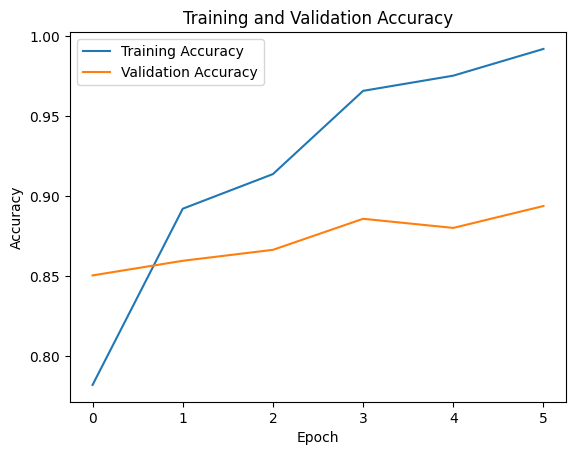

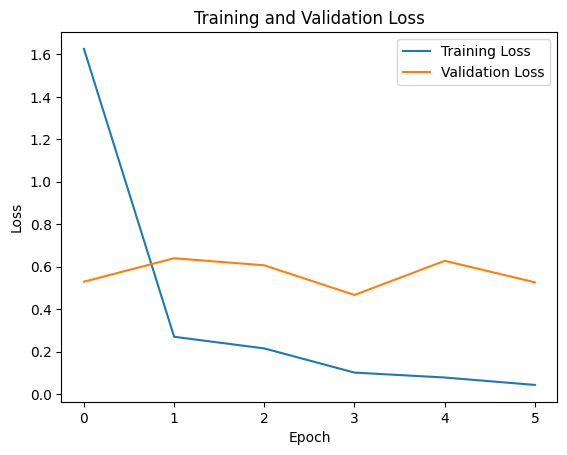

In [7]:
# Retrieve a list of list results on training and validation data sets for each training epoch
train_acc = history.history['accuracy']    
val_acc = history.history['val_accuracy'] 
train_loss = history.history['loss']       
val_loss = history.history['val_loss']      

epochs = range(len(train_acc))  # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')              # x-axis label
plt.ylabel('Accuracy')           # y-axis label
plt.legend()                   
plt.show()

# Plot training and validation loss per epoch
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')              # x-axis label
plt.ylabel('Loss')               # y-axis label
plt.legend()                    
plt.show()

